In [404]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [405]:
# dfm=pd.read_csv('./datasets/FINAL_CLEAN2.txt')
dfm=pd.read_csv('./datasets/merged4.csv')


In [359]:

df.head(2)

,lat,year,tabaghat,anbari,balkon,vahed,long,metrag,asansor,sanad,room,service,shomali,parking,garmayesh,noemelk,sarmayesh,asansortabaghe,price
0,35.683313,1396.0,4.0,0.0,1.0,4.0,51.463173,40.0,2.0,11.0,1.0,4.0,0.0,0.0,1.0,2.0,0.0,8.0,38.750
1,35.711047,1391.0,5.0,0.0,0.0,5.0,51.503901,80.0,1.0,11.0,2.0,1.0,0.0,1.0,2.0,2.0,0.0,5.0,45.625


In [425]:
df=dfm[dfm.source=='iranfile'].loc[:,['lat', 'year', 'tabaghat', 'price', 'anbari', 'balkon',
       'vahed',  'long', 'metrag', 'asansor', 'sanad', 'room', 'service' , 'shomali',
       'parking', 'garmayesh', 'noemelk','sarmayesh']]
# noemelk garmayesh sanad service
#date  sarmayesh

In [426]:
df.shape

(11324, 18)

In [427]:
df['noemelk'].replace(['آپارتمان', 'اداری', 'مغازه', 'کلنگی', 'مستغلات', 'تجاری', 'زمین', 'ویلا', 'کارگاه،کارخانه'], [2,4,5,6,1,7,8,6,9], inplace=True)
df['garmayesh'].replace(['Powerhouse', 'package' , '0' ],[1, 2,1], inplace=True)
df['sanad']=df['sanad'].astype('category').cat.codes
df['sarmayesh']=df['sarmayesh'].astype('category').cat.codes
df['service'].replace(['نامشخص', 'ايراني فرنگي','French','Iranian'],[4,1,3,4], inplace=True)
df['asansor'].replace([1, 0],[1, 2], inplace=True)

# df['sanad'].replace(['Under', 'Diploma'],[0, 1], inplace=True)
# df['Education'].replace(['Under', 'Diploma'],[0, 1], inplace=True)
# df['Education'].replace(['Under', 'Diploma'],[0, 1], inplace=True)

In [428]:
for col in df.columns:
    df=df[pd.to_numeric(df[col], errors='coerce').notnull()] 
    df[col]=df[col].astype('float64') 
df.price=df.price/1000000
df['asansortabaghe']=df.asansor*df.tabaghat


In [429]:
df = df.reindex(columns=['lat', 'year', 'tabaghat', 'anbari', 'balkon', 'vahed', 'long',
       'metrag', 'asansor', 'sanad', 'room', 'service', 'shomali', 'parking',
       'garmayesh', 'noemelk', 'sarmayesh','asansortabaghe', 'price'])

In [430]:
df=df[(np.abs(stats.zscore(df)) <4).all(axis=1)]
df.shape

(9138, 19)

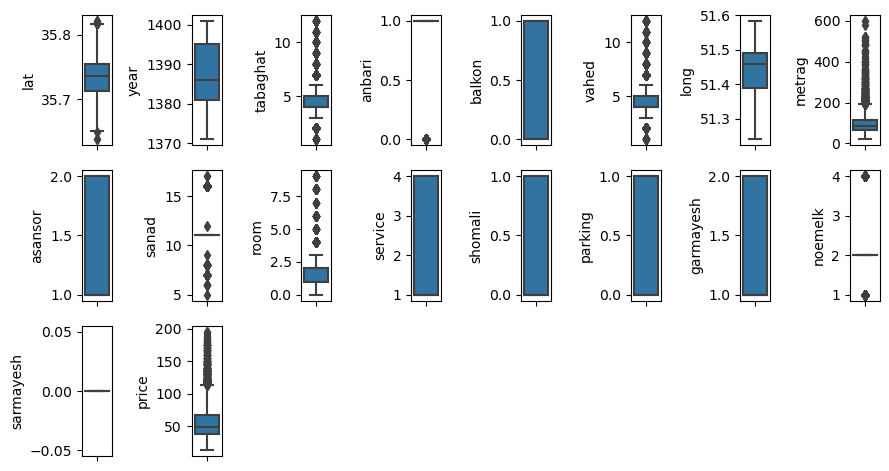

In [316]:
plt.figure(figsize=(9,5 ))
no=0
for col in df.columns:
    no+=1
    plt.subplot(3,8,no)
    plt.tight_layout()
    sns.boxplot(y=df[col])  

<Figure size 1200x500 with 0 Axes>

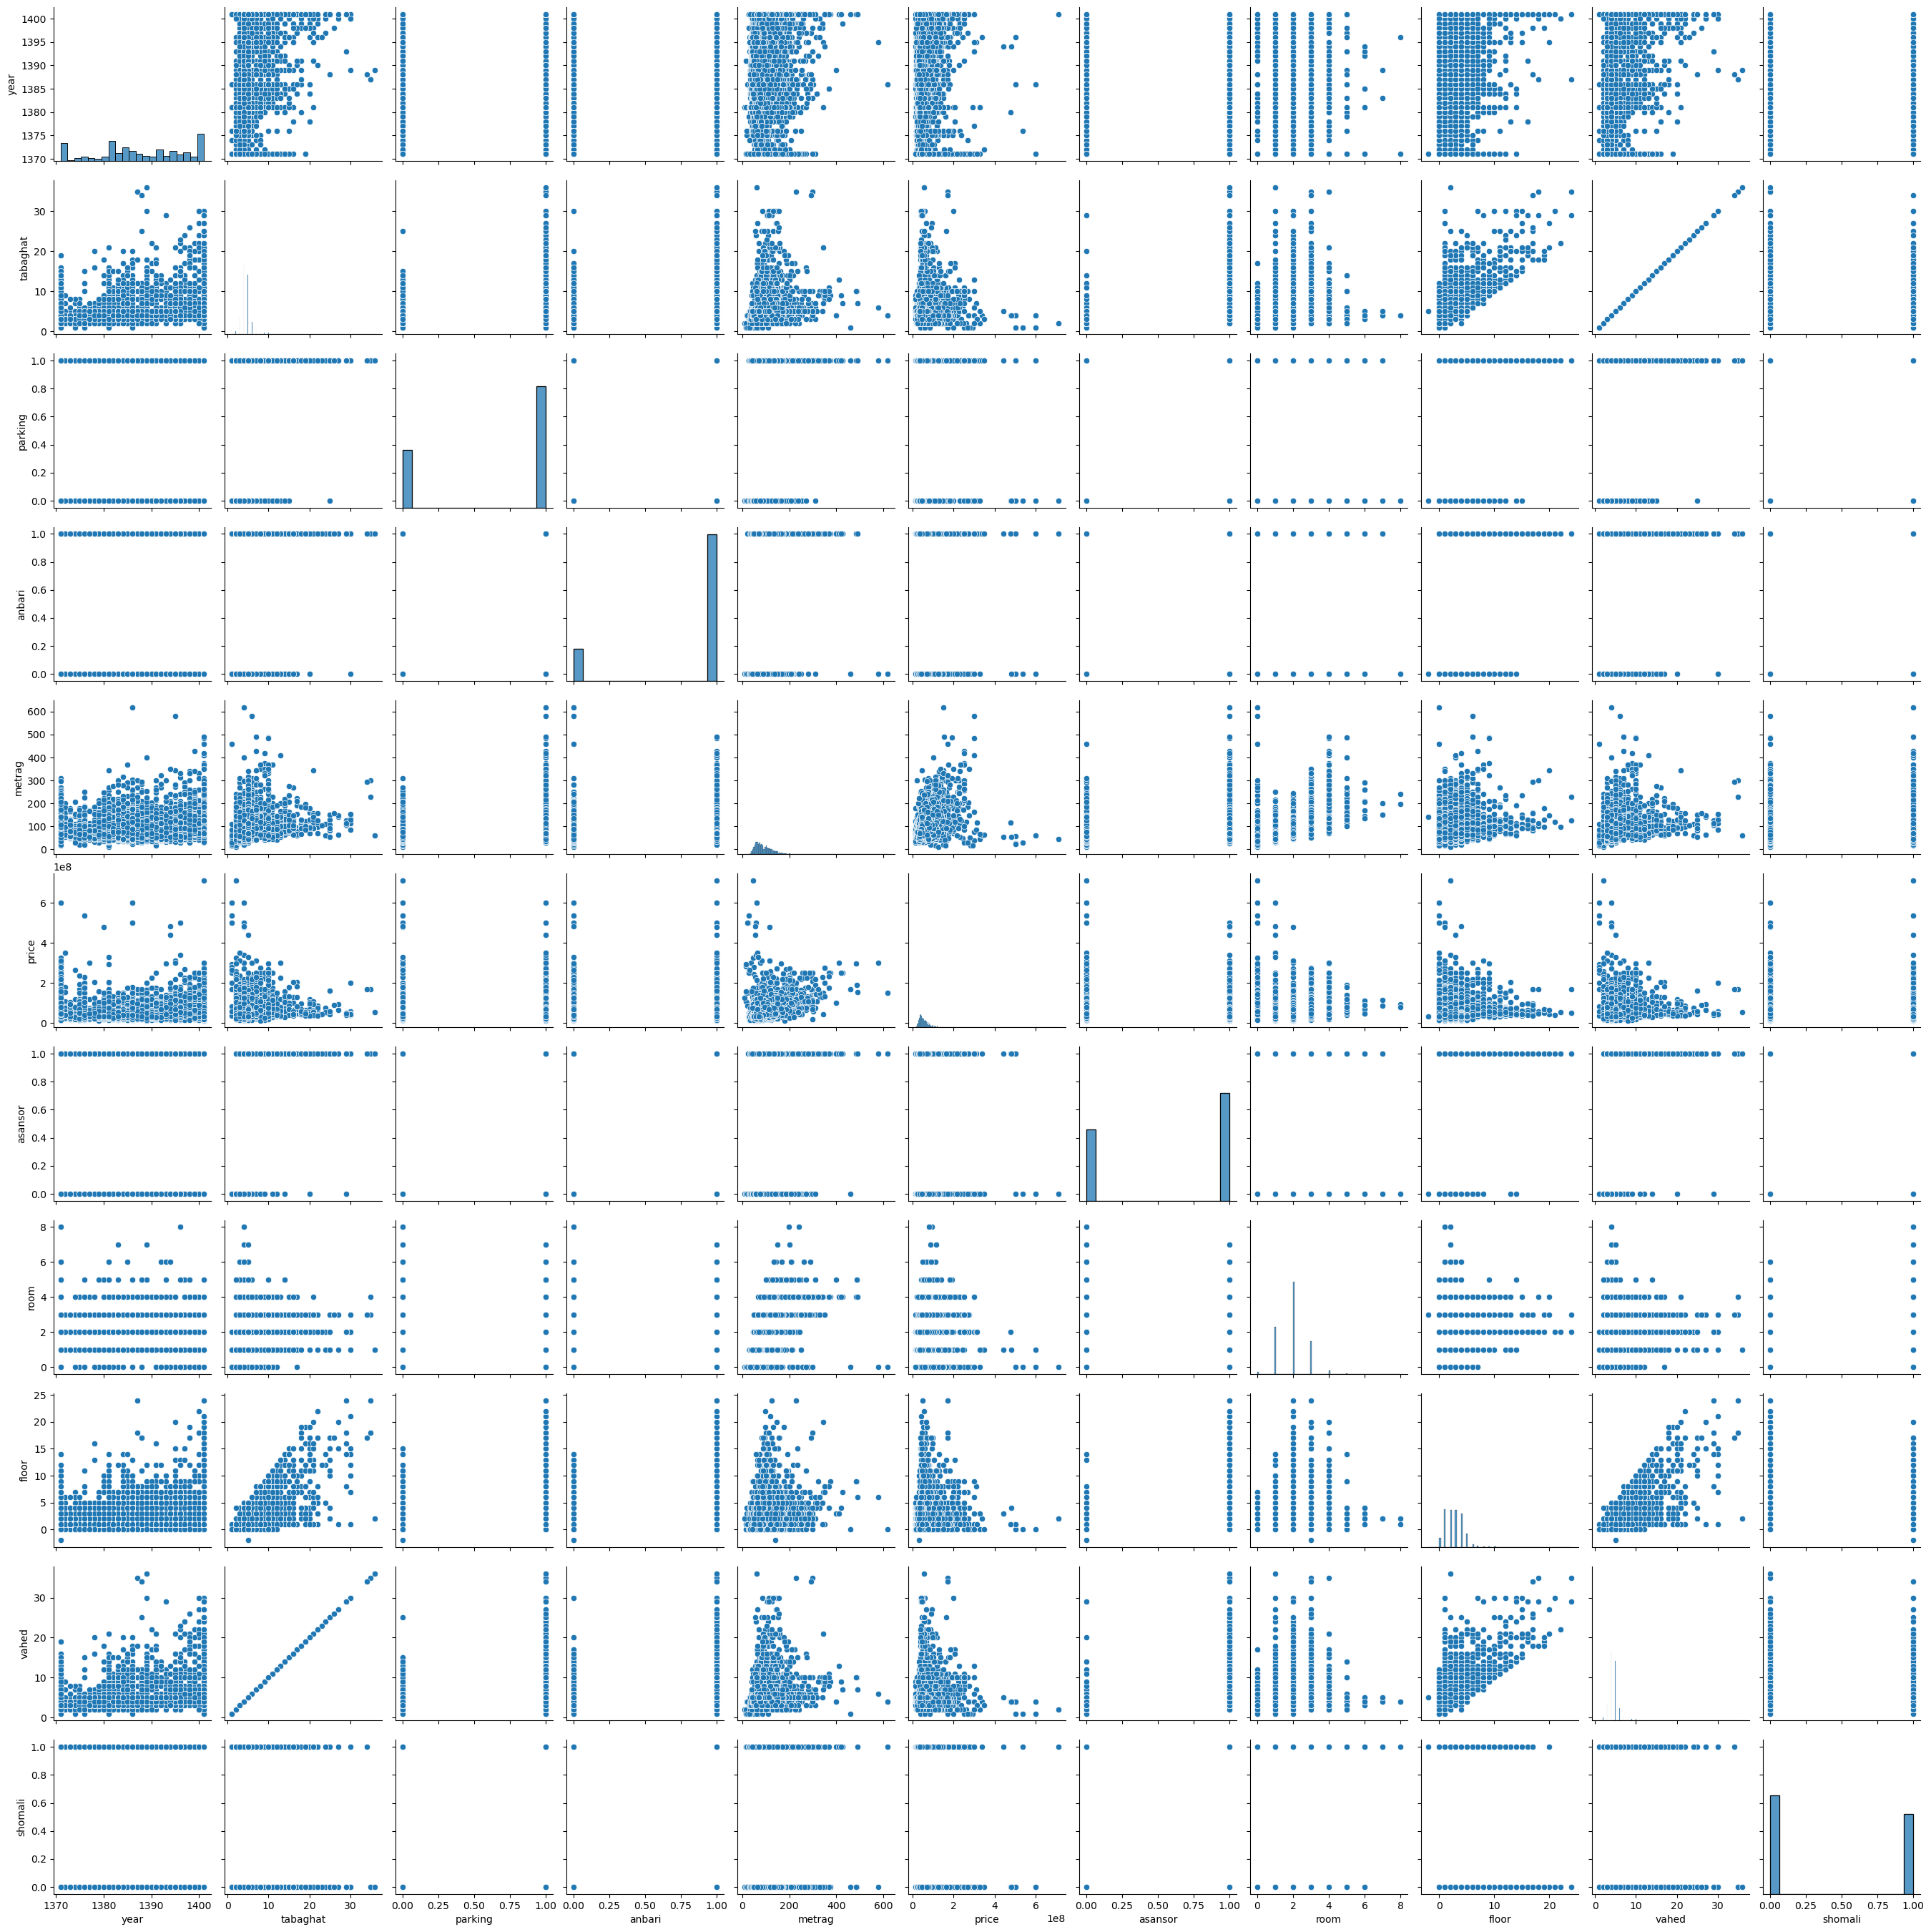

In [56]:
plt.figure(figsize=(12, 5))
sns.pairplot(df)

In [ ]:
sns.scatterplot()

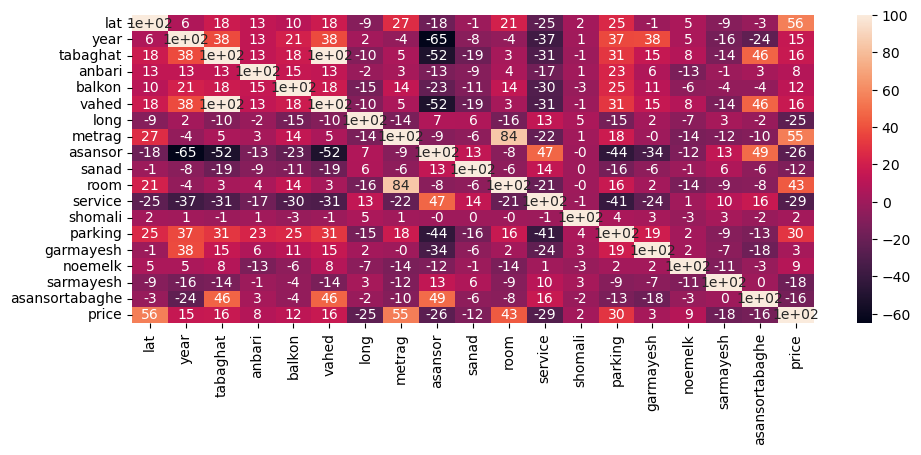

In [433]:
corr_date = df.corr().round(2)*100
fig = plt.figure(figsize =(11, 4)) 
# figsize=(11,1)
ax=sns.heatmap(corr_date, annot=True)
plt.xticks()
plt.show()

### D

In [413]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor,LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import math

In [431]:
X = df.iloc[:, :-1].values
y = df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3 , random_state=85, )

In [432]:
model = make_pipeline(preprocessing.MinMaxScaler(),preprocessing.PolynomialFeatures(degree=3, include_bias=False), Ridge(alpha=3))
# model = make_pipeline(preprocessing.MinMaxScaler(),SGDRegressor(max_iter=10000, tol=1e-3))
# SGDRegressor(max_iter=1000, tol=1e-3,penalty='l1'))
model.fit(X_train, y_train)
# print("SGD intercept: ", model[1].intercept_)
# print("SGD coef : ", model[1].coef_)
# print("iteration: ", model[1].n_iter_)
y_predict= model.predict(X_test)
print("R2: ", metrics.r2_score(y_test, y_predict))
print("MSE: ", metrics.mean_squared_error(y_test, y_predict))
print("MAE : ", metrics.mean_absolute_error(y_test, y_predict))
print("MAPE : ", metrics.mean_absolute_percentage_error(y_test, y_predict))
print("Error percent:     ","%.0f%%" %(100*math.sqrt(metrics.mean_squared_error(y_test, y_predict)) / df["price"].mean()))
# "%.0f%%" %(100*accuracy) 

R2:  0.6496518847382815
MSE:  321.91838565347126
MAE :  11.722910808086604
MAPE :  0.20828294479858828
Error percent:      30%


In [424]:
dfm.shape

(20857, 31)

In [ ]:
increased parameters : poly 3 ridge3  zscore(df) <3 : 8400 /11300
R2:  0.6634510482313285
MSE:  219.8561740378168
MAE :  10.301833136993803
MAPE :  0.19171248128279209
Error percent:      26%

increased parameters : poly 3 ridge3  zscore(df) <4 : 9100

R2:  0.6496518847382815
MSE:  321.91838565347126
MAE :  11.722910808086604
MAPE :  0.20828294479858828
Error percent:      30%


increased parameters : poly 3 ridge3  zscore(df) <2 : 5900
R2:  0.6894386851353684
MSE:  167.70390195414134
MAE :  9.277389540845213
MAPE :  0.16813843838639844
Error percent:      23%

increased parameters : poly 3 ridge5 
R2:  0.6625740815974266
MSE:  250.15602996088032
MAE :  10.949376342045293
MAPE :  0.1965688298502718
Error percent:      28%


poly4:
R2:  0.34615990416291476
MSE:  435.317015422301
MAE :  15.031867745831589
MAPE :  0.2907052621818657
Error percent:      37%

stochas:
R2:  0.3139989826698202
MSE:  456.72927882851036
MAE :  15.305115454603795
MAPE :  0.29247628980019874
Error percent:      38%

In [139]:
pd.concat( [pd.DataFrame(X_test),pd.Series(y_predict),pd.Series(y_test )],  axis=1)


,0,1,2,3,4,5,6,7,8,9,0,1
0,1381.0,4.0,1.0,1.0,105.0,0.0,2.0,1.0,4.0,1.0,57.777573,47.619
1,1398.0,4.0,1.0,1.0,81.0,1.0,2.0,3.0,4.0,1.0,58.803273,44.444
2,1380.0,3.0,1.0,1.0,100.0,0.0,2.0,3.0,3.0,1.0,56.455698,100.000
3,1394.0,5.0,0.0,1.0,77.0,1.0,2.0,2.0,5.0,1.0,44.787645,44.800
4,1371.0,4.0,1.0,1.0,71.0,0.0,2.0,2.0,4.0,0.0,52.530190,35.000
...,...,...,...,...,...,...,...,...,...,...,...,...
2587,1384.0,3.0,0.0,1.0,61.0,0.0,1.0,2.0,3.0,1.0,38.533645,38.852
2588,1371.0,6.0,1.0,1.0,166.0,1.0,3.0,1.0,6.0,1.0,66.998287,49.397
2589,1391.0,5.0,1.0,1.0,135.0,1.0,3.0,3.0,5.0,0.0,68.125475,81.481
2590,1379.0,4.0,0.0,0.0,72.0,0.0,2.0,0.0,4.0,1.0,45.304608,43.750


In [60]:
print("R2: ", metrics.r2_score(y_test, y_predict))
print("MSE: ", metrics.mean_squared_error(y_test, y_predict))
print("MAE : ", metrics.mean_absolute_error(y_test, y_predict))
print("MAPE : ", metrics.mean_absolute_percentage_error(y_test, y_predict))
math.sqrt(metrics.mean_squared_error(y_test, y_predict)) / df["class"].mean()

R2:  0.8299097936538993
MSE:  3007844.1854606974
MAPE :  1227.809634535891
MAPE :  0.11743124647410606


0.18291800894563293

حال مدل قبلی را در همان هتگامی که بهترین اکسترمم را پیدا کرد نگه دارید و نتیجه را مقایسه کنید


در حالتی  که از تمام ظرفیت پردازشیه سیستم استفاده میکنید بدون اسکیل کردن روی داده ها امتحان کنید  LinearRegression حال مدل

In [10]:
X = df.iloc[:, :-1].values
y = df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3 , random_state=85, )

In [ ]:
sgr_model = SGDRegressor(max_iter=1000, tol=1e-3,penalty='l2')
sgr_model.fit(X_train, y_train)
y_predict= sgr_model.predict(X_test)

In [13]:
print("R2: ", metrics.r2_score(y_test, y_predict))
print("MSE: ", metrics.mean_squared_error(y_test, y_predict))
print("MAE : ", metrics.mean_absolute_error(y_test, y_predict))
print("MAPE : ", metrics.mean_absolute_percentage_error(y_test, y_predict))
# math.sqrt(metrics.mean_squared_error(y_test, y_predict)) / df["class"].mean()

R2:  -4.895944976090749e+25
MSE:  8.65789979624401e+32
MAE :  2.8744550433000508e+16
MAPE :  3473579959411.7437


In [15]:
lr_model = make_pipeline(preprocessing.StandardScaler(), LinearRegression())

lr_model.fit(X_train, y_train)
y_predict= lr_model.predict(X_test)

In [58]:
print("R2: ", metrics.r2_score(y_test, y_predict))
print("MSE: ", metrics.mean_squared_error(y_test, y_predict))
print("MAE : ", metrics.mean_absolute_error(y_test, y_predict))
print("MAPE : ", metrics.mean_absolute_percentage_error(y_test, y_predict))
math.sqrt(metrics.mean_squared_error(y_test, y_predict)) / df["class"].mean()


R2:  0.046598322460391195
MSE:  0.23484848484848486
MAE :  0.23484848484848486
MAPE :  341181789952310.44


KeyError: 'class'

حال مدل بالا را با استادارد اسکل در پایپ لاین امتحان کنید از مقایسه دو نتیجه با هم چه چیزی میفهمید علت را در بیس کد پیدا کنید

In [ ]:
باتوجه به هم مقیاس نبودن داده ها فیچرهایی که اعداد بالاتری دارند تاثیر زیادی بر روی مدل دارند

روی داده های تایتانیک اعمال کنید امتحان کنید  LinearRegression حال مدل

In [4]:
df=pd.read_csv('titanic.csv')
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
df['Sex'].replace(['male', 'female'],[0, 1], inplace=True)
df2=df.iloc[:,[1,2,4,5,6,7,9]]

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


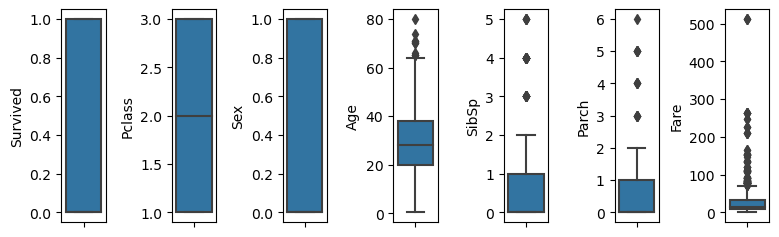

In [65]:
plt.figure(figsize=(9,5 ))
no=0
for col in df2.columns:
    no+=1
    plt.subplot(2,8,no)
    plt.tight_layout()
    sns.boxplot(y=df2[col])  

In [7]:
df2.dropna(inplace=True)
df2=df2[(np.abs(stats.zscore(df2)) <3).all(axis=1)]
df2

/tmp/ipykernel_1265/573534759.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace=True)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
884,0,3,0,25.0,0,0,7.0500
886,0,2,0,27.0,0,0,13.0000
887,1,1,1,19.0,0,0,30.0000
889,1,1,0,26.0,0,0,30.0000


In [8]:
X = df2.iloc[:, 1:7].values
y = df2.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2 , random_state=85, )


array([[ 3.    ,  0.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 3.    ,  1.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 1.    ,  1.    , 19.    ,  0.    ,  0.    , 30.    ],
       [ 1.    ,  0.    , 26.    ,  0.    ,  0.    , 30.    ],
       [ 3.    ,  0.    , 32.    ,  0.    ,  0.    ,  7.75  ]])

In [44]:
lr_model = make_pipeline(preprocessing.StandardScaler(), LogisticRegression(penalty='l2'))

lr_model.fit(X_train, y_train)
y_predict= lr_model.predict(X_test)

In [55]:
print('accuracy_score:    ',accuracy_score(y_test, y_predict))
print('confusion_matrix:   ', confusion_matrix(y_test, y_predict))
print('classification_report:   ', classification_report(y_test, y_predict))

accuracy_score:     0.7651515151515151
confusion_matrix:    [[64 10]
 [21 37]]
classification_report:                  precision    recall  f1-score   support

           0       0.75      0.86      0.81        74
           1       0.79      0.64      0.70        58

    accuracy                           0.77       132
   macro avg       0.77      0.75      0.75       132
weighted avg       0.77      0.77      0.76       132



In [56]:
df3=pd.concat(
    [pd.DataFrame(X_test),pd.Series(y_predict),pd.Series(y_test )],
    axis=1)
    # join="outer",
    # ignore_index=False,
    # keys=None,
    # levels=None,
    # names=None,
    # verify_integrity=False,
    # copy=True,

In [57]:
df3

,0,1,2,3,4,5,0,1
0,3.0,1.0,20.0,0.0,0.0,8.6625,1,0
1,1.0,1.0,24.0,0.0,0.0,83.1583,1,1
2,3.0,0.0,34.0,0.0,0.0,8.0500,0,0
3,2.0,0.0,21.0,1.0,0.0,11.5000,0,0
4,3.0,0.0,20.0,0.0,0.0,7.2292,0,1
...,...,...,...,...,...,...,...,...
127,1.0,0.0,22.0,0.0,0.0,135.6333,1,0
128,1.0,0.0,36.0,0.0,0.0,40.1250,0,0
129,1.0,1.0,39.0,1.0,0.0,55.9000,1,1
130,3.0,0.0,32.0,1.0,0.0,15.8500,0,0


In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score